In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
data = pd.read_csv('heart_disease.csv')

In [3]:
data.shape

(919, 14)

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart_status
0,63,0.0,0.0,145.0,233.0,1.0,2.0,150.0,NaN,2.3,2.0,0.0,1,0.0
1,67,0.0,3.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,3.0,0,2.0
2,67,0.0,3.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,2.0,2,1.0
3,37,0.0,2.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,2.0,0.0,0,0.0
4,41,1.0,1.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,0,0.0


In [5]:
data.isnull().sum()

age             0
sex             6
cp              1
trestbps        0
chol            0
fbs             6
restecg         5
thalch          0
exang           4
oldpeak         0
slope           2
ca              4
thal            0
heart_status    4
dtype: int64

In [6]:
data = data.fillna(0) 

In [7]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart_status
0,63,0.0,0.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,2.0,0.0,1,0.0
1,67,0.0,3.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,3.0,0,2.0
2,67,0.0,3.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,2.0,2,1.0
3,37,0.0,2.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,2.0,0.0,0,0.0
4,41,1.0,1.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,0,0.0


In [8]:
data.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heart_status    0
dtype: int64

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns


In [10]:
data.shape

(919, 14)

In [11]:
data['heart_status'].value_counts()

heart_status
0.0    411
1.0    265
2.0    109
3.0    106
4.0     28
Name: count, dtype: int64

<Axes: >

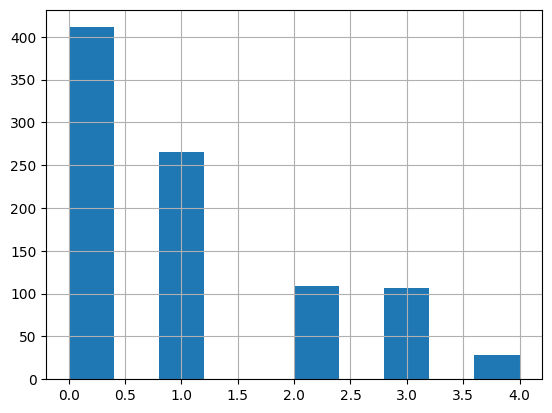

In [12]:
data.heart_status.hist()
#plt.show()

In [13]:
dic = {4: 1, 3: 1, 2: 1, 1: 1, 0:0}
data['heart_status'] = data['heart_status'].map(dic)

In [14]:
print(data['heart_status'].value_counts())

data.head()

heart_status
1    508
0    411
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart_status
0,63,0.0,0.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,2.0,0.0,1,0
1,67,0.0,3.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,3.0,0,1
2,67,0.0,3.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,2.0,2,1
3,37,0.0,2.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,2.0,0.0,0,0
4,41,1.0,1.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,0,0


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart_status
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,53.509249,0.211099,2.250272,132.704853,200.791393,0.150163,0.606094,136.815734,0.420022,0.973408,0.738847,0.501632,1.178455,0.552775
std,9.429689,0.408311,0.931439,18.070335,109.213597,0.357426,0.806703,25.371260,0.493831,1.120490,0.598949,0.786423,0.942077,0.497478
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,178.500000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,224.000000,0.000000,0.000000,138.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,0.000000,3.000000,141.210000,268.000000,0.000000,1.000000,156.000000,1.000000,1.900000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           919 non-null    int64  
 1   sex           919 non-null    float64
 2   cp            919 non-null    float64
 3   trestbps      919 non-null    float64
 4   chol          919 non-null    float64
 5   fbs           919 non-null    float64
 6   restecg       919 non-null    float64
 7   thalch        919 non-null    float64
 8   exang         919 non-null    float64
 9   oldpeak       919 non-null    float64
 10  slope         919 non-null    float64
 11  ca            919 non-null    float64
 12  thal          919 non-null    int64  
 13  heart_status  919 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 100.6 KB


Normalizing the data

In [17]:
X = data.drop('heart_status', axis=1)
y = data['heart_status']
df = pd.DataFrame(normalize(X))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.197456,0.000000,0.000000,0.454462,0.730274,0.003134,0.006268,0.470133,0.000000,0.007209,0.006268,0.000000,0.003134
1,0.190594,0.000000,0.008534,0.455150,0.813580,0.000000,0.005689,0.307226,0.002845,0.004267,0.002845,0.008534,0.000000
2,0.225856,0.000000,0.010113,0.404518,0.771956,0.000000,0.006742,0.434857,0.003371,0.008765,0.003371,0.006742,0.006742
3,0.108749,0.000000,0.005878,0.382091,0.734791,0.000000,0.000000,0.549624,0.000000,0.010287,0.005878,0.000000,0.000000
4,0.136827,0.003337,0.003337,0.433842,0.680799,0.000000,0.006674,0.574007,0.000000,0.004672,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.137756,0.002551,0.007653,0.323981,0.849493,0.002551,0.002551,0.392858,0.000000,0.000000,0.002551,0.000000,0.000000
915,0.257379,0.000000,0.000000,0.593881,0.577027,0.000000,0.004151,0.497904,0.004151,0.008477,0.004151,0.000000,0.008303
916,0.197372,0.000000,0.010766,0.437808,0.800255,0.003589,0.003589,0.358859,0.000000,0.000000,0.003589,0.003589,0.003589
917,0.134269,0.000000,0.006945,0.349123,0.891270,0.002315,0.004630,0.256107,0.002315,0.005049,0.002315,0.000000,0.004630


Removing and managing Outliers

In [18]:
# Initialize the counters for detected and managed outliers
detected_outliers = 0
managed_outliers = 0

# Loop through each of the 178 explanatory variables and calculate the IQR and bounds
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify any data points that fall outside the bounds and either remove or adjust them
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    if outliers.any():
        detected_outliers += outliers.sum()

        
        df.loc[outliers, col] = np.nanmedian(df[col])
        managed_outliers += outliers.sum()

print(f"Detected {detected_outliers} outliers and managed {managed_outliers} outliers.")


Detected 759 outliers and managed 759 outliers.


In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.197456,0.0,0.000000,0.454462,0.730274,0.0,0.006268,0.470133,0.000000,0.007209,0.006268,0.000000,0.003134
1,0.190594,0.0,0.008534,0.455150,0.813580,0.0,0.005689,0.307226,0.002845,0.004267,0.002845,0.000000,0.000000
2,0.225856,0.0,0.010113,0.404518,0.771956,0.0,0.006742,0.434857,0.003371,0.008765,0.003371,0.006742,0.006742
3,0.108749,0.0,0.005878,0.382091,0.734791,0.0,0.000000,0.549624,0.000000,0.010287,0.005878,0.000000,0.000000
4,0.136827,0.0,0.003337,0.433842,0.680799,0.0,0.006674,0.574007,0.000000,0.004672,0.000000,0.000000,0.000000


In [20]:
df.shape

(919, 13)

In [21]:
!pip install imblearn

import imblearn
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('heart_status', axis=1), data['heart_status'])

X.shape, y.shape


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


((1016, 13), (1016,))

In [22]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart_status
age,1.000000,-0.056809,0.166300,0.268315,-0.084258,0.220011,0.213992,-0.375895,0.229350,0.293313,0.304781,0.416773,0.343528,0.282673
sex,-0.056809,1.000000,-0.170574,-0.015583,0.188813,-0.075624,0.014610,0.189805,-0.202506,-0.137110,-0.130672,-0.140164,-0.403888,-0.306958
cp,0.166300,-0.170574,1.000000,0.021791,-0.128964,0.021145,0.025513,-0.338637,0.396431,0.222123,0.255918,0.228458,0.317746,0.472201
trestbps,0.268315,-0.015583,0.021791,1.000000,0.079679,0.172862,0.100173,-0.114507,0.165920,0.195935,0.093809,0.056785,0.134646,0.120067
chol,-0.084258,0.188813,-0.128964,0.079679,1.000000,0.090641,0.112802,0.223979,-0.028451,0.044927,-0.082136,-0.158024,-0.170566,-0.223184
fbs,0.220011,-0.075624,0.021145,0.172862,0.090641,1.000000,0.141141,-0.056486,0.068115,0.110797,0.157940,0.127015,0.124140,0.108540
restecg,0.213992,0.014610,0.025513,0.100173,0.112802,0.141141,1.000000,0.043720,0.046616,0.125042,0.070933,0.169287,-0.014906,0.065429
thalch,-0.375895,0.189805,-0.338637,-0.114507,0.223979,-0.056486,0.043720,1.000000,-0.369608,-0.178784,-0.418147,-0.239404,-0.410545,-0.390269
exang,0.229350,-0.202506,0.396431,0.165920,-0.028451,0.068115,0.046616,-0.369608,1.000000,0.430455,0.378621,0.152504,0.414717,0.450633
oldpeak,0.293313,-0.137110,0.222123,0.195935,0.044927,0.110797,0.125042,-0.178784,0.430455,1.000000,0.452145,0.263696,0.356401,0.379014


In [23]:
print('Number of records of No Heart Disease {0} VS Heart Disease {1}'.format(len(y == True), len(y == False)))

Number of records of No Heart Disease 1016 VS Heart Disease 1016


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(812, 13), (204, 13), (812,), (204,)]

In [25]:
models = [LogisticRegression(), SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          KNeighborsClassifier()]

#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)

# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Score', 'Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions
    return df_result

['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']


In [26]:
classifiers(models)

Initialized classifier LogisticRegression with default parameters 

Score of classifier LogisticRegression is: 0.8333333333333334 

Initialized classifier SVC with default parameters 



C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adlercohen\AppData\Local\Temp\ipykernel_18488\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is whe

Score of classifier SVC is: 0.696078431372549 

Initialized classifier DecisionTreeClassifier with default parameters 

Score of classifier DecisionTreeClassifier is: 0.8137254901960784 

Initialized classifier RandomForestClassifier with default parameters 

Score of classifier RandomForestClassifier is: 0.8823529411764706 

Initialized classifier GradientBoostingClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_18488\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier GradientBoostingClassifier is: 0.8627450980392157 

Initialized classifier KNeighborsClassifier with default parameters 

Score of classifier KNeighborsClassifier is: 0.6715686274509803 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_18488\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

,Score,Predictions
LogisticRegression,83.33%,"[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, ..."
SVC,69.61%,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, ..."
DecisionTreeClassifier,81.37%,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, ..."
RandomForestClassifier,88.24%,"[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, ..."
GradientBoostingClassifier,86.27%,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, ..."
KNeighborsClassifier,67.16%,"[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ..."


In [27]:
# The k-fold cross-validation is a technique that entails splitting the training data into k subsets.
# Models are trained and evaluated k times, with each subset being used once as a validation set to evaluate the model.
from sklearn.model_selection import KFold
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = KFold(n_splits=3, random_state=None)

#GridSearchCV is a scikit-learn function that performs hyperparameter tuning by training and evaluating
# a machine learning model using different combinations of hyperparameters

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.879318 using {'max_features': 'log2', 'n_estimators': 1000}
0.864557 (0.037593) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.874402 (0.028987) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.871933 (0.030876) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.857127 (0.020180) with: {'max_features': 'log2', 'n_estimators': 10}
0.873154 (0.019595) with: {'max_features': 'log2', 'n_estimators': 100}
0.879318 (0.025944) with: {'max_features': 'log2', 'n_estimators': 1000}


In [28]:
model=model.fit(X_train,y_train)

In [29]:
pred=model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[84  9]
 [16 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        93
           1       0.91      0.86      0.88       111

    accuracy                           0.88       204
   macro avg       0.88      0.88      0.88       204
weighted avg       0.88      0.88      0.88       204



In [32]:
# Saving our model into a pickle file

import pickle

with open('heart_disease_model', 'wb') as f: # wb means we are writing our model as a binary
    pickle.dump(model,f) # f means the file we named as model_pickle

# model_pickle is the name we gave to the file we saved our model in
#pickle.dump(model, f) means dump my model in this file

In [33]:
with open('heart_disease_model', 'rb') as f:
    heart_disease_model = pickle.load(f)

In [34]:
# New patient records

CL = (64, 1,  3, 110, 211, 0, 0, 144, 1, 1.8, 1, 0, 1)
CK = (63,1, 3, 140, 463, 0, 2, 104, 0, 4, 1, 3, 2)
CT = (54, 1, 0, 98, 306, 1, 0, 128, 1, 0, 1, 1, 0)
CJ = (39, 0, 1, 120, 260, 0, 1, 202, 0, 0.9, 2, 0, 2)
CD = (77, 1, 1, 356, 145, 0, 1, 143, 0, 0, 1, 0, 2)
CZ = (45, 0, 3, 102, 333, 0, 2, 117, 1, 0, 1, 3, 1)
CA = (22, 1, 3, 108, 194, 1, 0, 136, 0, 1.9, 1, 3, 0)
CF = (51, 0, 2, 190, 0, 0, 0, 92, 0, 2.4, 1, 2, 0)
CV = (48, 0, 2, 140, 141.15, 0, 1, 93.34, 1, 1.5, 1, 3, 2)
CM = (56, 0, 1, 135.82, 142 , 1, 0, 226.17 , 1, 2.545, 1, 2, 2)

In [35]:
patient_data = (CL,CK, CT, CJ, CD, CZ, CA, CF, CV, CM)

new_patient_records = pd.DataFrame(patient_data)

In [36]:
new_patient_records.columns = X.columns

new_patient_records

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,64,1,3,110.00,211.00,0,0,144.00,1,1.800,1,0,1
1,63,1,3,140.00,463.00,0,2,104.00,0,4.000,1,3,2
2,54,1,0,98.00,306.00,1,0,128.00,1,0.000,1,1,0
3,39,0,1,120.00,260.00,0,1,202.00,0,0.900,2,0,2
4,77,1,1,356.00,145.00,0,1,143.00,0,0.000,1,0,2
5,45,0,3,102.00,333.00,0,2,117.00,1,0.000,1,3,1
6,22,1,3,108.00,194.00,1,0,136.00,0,1.900,1,3,0
7,51,0,2,190.00,0.00,0,0,92.00,0,2.400,1,2,0
8,48,0,2,140.00,141.15,0,1,93.34,1,1.500,1,3,2
9,56,0,1,135.82,142.00,1,0,226.17,1,2.545,1,2,2


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
norm = MinMaxScaler().fit(new_patient_records)
 
# Transform the  data
new_patient_record_norm = norm.transform(new_patient_records)

df = pd.DataFrame(new_patient_record_norm)
 
df.columns = X.columns

new_patient_record_norm = df

In [39]:
new_patient_record_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0.763636,1.0,1.000000,0.046512,0.455724,0.0,0.0,0.387568,1.0,0.45000,0.0,0.000000,0.5
1,0.745455,1.0,1.000000,0.162791,1.000000,0.0,1.0,0.089439,0.0,1.00000,0.0,1.000000,1.0
2,0.581818,1.0,0.000000,0.000000,0.660907,1.0,0.0,0.268316,1.0,0.00000,0.0,0.333333,0.0
3,0.309091,0.0,0.333333,0.085271,0.561555,0.0,0.5,0.819855,0.0,0.22500,1.0,0.000000,1.0
4,1.000000,1.0,0.333333,1.000000,0.313175,0.0,0.5,0.380115,0.0,0.00000,0.0,0.000000,1.0
5,0.418182,0.0,1.000000,0.015504,0.719222,0.0,1.0,0.186331,1.0,0.00000,0.0,1.000000,0.5
6,0.000000,1.0,1.000000,0.038760,0.419006,1.0,0.0,0.327942,0.0,0.47500,0.0,1.000000,0.0
7,0.527273,0.0,0.666667,0.356589,0.000000,0.0,0.0,0.000000,0.0,0.60000,0.0,0.666667,0.0
8,0.472727,0.0,0.666667,0.162791,0.304860,0.0,0.5,0.009987,1.0,0.37500,0.0,1.000000,1.0
9,0.618182,0.0,0.333333,0.146589,0.306695,1.0,0.0,1.000000,1.0,0.63625,0.0,0.666667,1.0


In [40]:
results = heart_disease_model.predict(new_patient_record_norm)

In [41]:
results

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [42]:
new_patient_records['Prediction'] = results

In [43]:
new_patient_records

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Prediction
0,64,1,3,110.00,211.00,0,0,144.00,1,1.800,1,0,1,1
1,63,1,3,140.00,463.00,0,2,104.00,0,4.000,1,3,2,1
2,54,1,0,98.00,306.00,1,0,128.00,1,0.000,1,1,0,1
3,39,0,1,120.00,260.00,0,1,202.00,0,0.900,2,0,2,1
4,77,1,1,356.00,145.00,0,1,143.00,0,0.000,1,0,2,0
5,45,0,3,102.00,333.00,0,2,117.00,1,0.000,1,3,1,1
6,22,1,3,108.00,194.00,1,0,136.00,0,1.900,1,3,0,1
7,51,0,2,190.00,0.00,0,0,92.00,0,2.400,1,2,0,1
8,48,0,2,140.00,141.15,0,1,93.34,1,1.500,1,3,2,1
9,56,0,1,135.82,142.00,1,0,226.17,1,2.545,1,2,2,1
